In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import prepare as p

In [69]:
df = p.wrangle_store_data()

In [70]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


In [71]:
train, test = p.split_time_data(df)

In [72]:
df.shape, train.shape, test.shape

((913000, 16), (730400, 16), (182600, 16))

In [36]:
# lets look at sales by store by month
store_month = train.groupby('store_id').resample('M').sales_total.sum().unstack()

In [30]:
store_month

sale_date,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,...,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31
store_id,,,,,,,,,,,,,,,,,,,,,
1,221774.22,222459.82,299616.28,330095.43,373023.05,384018.40,415542.90,375686.81,335169.11,317408.92,...,385080.14,439687.99,480555.66,495204.90,552746.12,475897.58,437250.15,421119.62,433825.40,321373.07
2,313859.06,318672.05,427780.05,473620.81,529055.80,548474.29,589500.91,527701.65,476945.55,451275.62,...,545088.41,621370.34,680322.67,708000.10,786419.15,676434.66,618766.56,596386.42,616096.49,452869.95
3,279675.72,280075.17,376721.28,417203.04,464730.49,488456.74,523413.57,471261.39,422492.88,401293.34,...,487446.00,557669.63,606834.55,627466.76,697970.39,603398.76,549844.93,526442.50,542766.25,401758.20
4,257215.76,263483.88,347948.19,385533.57,433174.05,450291.66,484097.16,432604.32,388224.32,371091.21,...,444207.61,509294.08,560037.97,577182.72,644984.00,553252.77,506510.74,485256.99,504902.98,370745.18
5,185404.16,187200.64,252857.86,280171.85,310778.72,326904.41,348890.70,314224.64,282925.47,269142.24,...,325315.17,367773.98,406070.11,418338.13,465295.89,401168.94,365670.24,355979.18,366627.25,268857.62
6,187900.56,187615.24,253601.22,278147.80,310239.70,327240.05,349273.29,315390.97,283387.82,269773.94,...,322997.00,372506.24,403174.59,417298.30,465781.15,400363.05,365500.74,352378.32,362151.10,270628.50
7,170486.02,171819.63,231261.55,254220.30,284084.11,297541.74,320944.08,287151.38,257642.15,247970.02,...,295689.28,335614.03,369701.93,382723.72,423546.84,364047.95,336880.84,322112.46,336771.76,246714.15
8,301499.88,302451.39,408845.78,448431.47,504747.63,526484.49,564502.79,504896.40,455534.68,435625.75,...,520662.54,591183.88,653650.14,671820.08,749725.70,650276.03,589802.83,570606.30,587279.32,435556.47
9,255608.94,258859.02,349478.69,386475.10,429412.84,448926.16,485081.99,434354.83,391649.01,371218.20,...,446828.05,511498.29,560044.99,580322.55,646444.13,555973.98,508836.76,488961.64,504613.47,370140.21


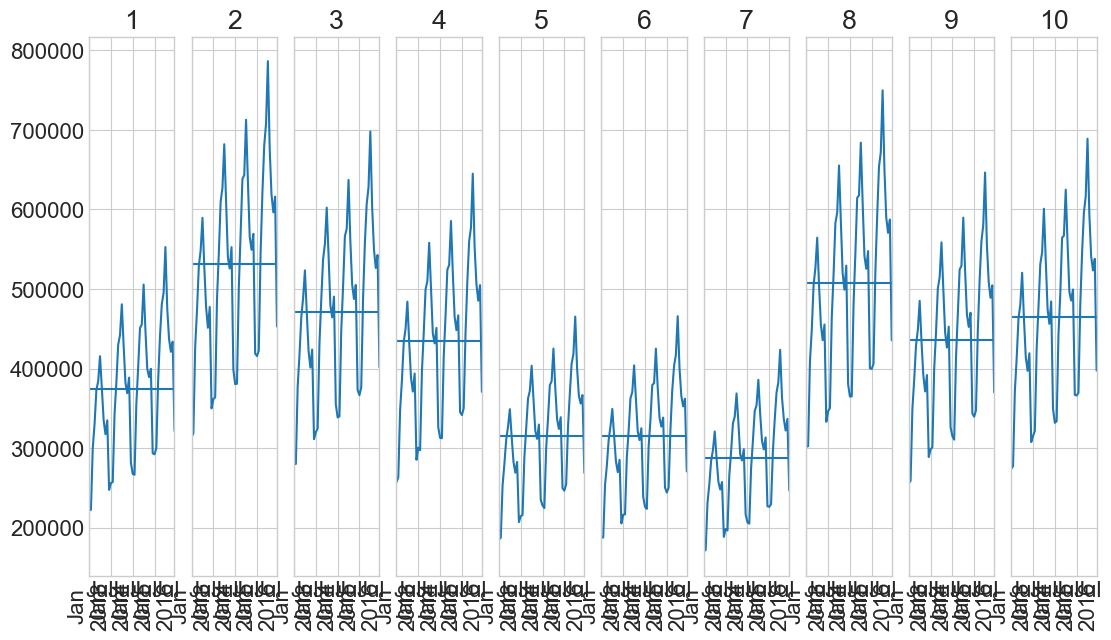

In [32]:
fig, axs = plt.subplots(1, 10, sharey=True, sharex=True)
for ax, (store_id, subset) in zip(axs, store_month.iterrows()):
    subset.plot(ax=ax, title=store_id)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.tick_params('x', rotation=90)

In [35]:
# lets look at sales by store by year
store_year = train.groupby('store_id').resample('Y').sales_total.sum().unstack()

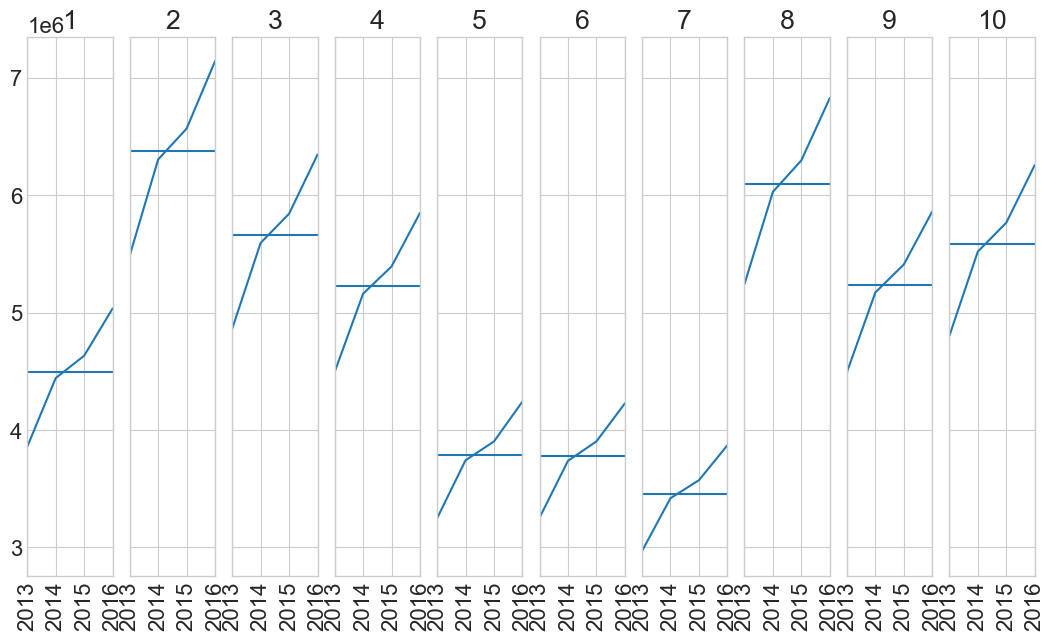

In [37]:
fig, axs = plt.subplots(1, 10, sharey=True, sharex=True)
for ax, (store_id, subset) in zip(axs, store_year.iterrows()):
    subset.plot(ax=ax, title=store_id)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.tick_params('x', rotation=90)

In [56]:
train.groupby([train.index.month, train.store_id]).sales_total.sum().unstack()

store_id,1,2,3,4,5,6,7,8,9,10
sale_date,,,,,,,,,,
1,1037700.77,1471515.68,1304988.40,1212170.08,874258.26,874488.07,801656.93,1412220.15,1208554.59,1286881.28
2,1045918.92,1485684.82,1320608.90,1223216.44,882152.75,878147.76,802886.93,1423988.61,1218043.55,1301948.66
3,1382532.79,1961475.01,1744251.73,1602661.80,1166751.57,1166840.24,1067068.08,1874032.91,1610520.80,1718915.35
4,1553206.66,2209538.06,1965084.43,1805506.04,1309363.06,1308370.48,1194551.87,2101869.80,1811737.57,1928606.84
5,1734362.27,2457154.17,2175497.98,2016899.93,1457915.72,1455416.40,1331521.35,2355752.26,2014651.86,2154654.14
6,1776542.22,2527012.77,2248230.62,2067378.31,1501465.84,1496598.88,1373500.42,2412149.59,2073042.08,2209984.18
7,1954641.69,2770611.89,2460808.94,2272709.60,1642838.95,1644085.20,1499008.18,2653352.29,2279825.46,2435033.15
8,1728908.99,2450290.96,2178368.55,2007516.32,1454111.13,1453766.97,1326717.84,2350249.43,2014467.39,2151440.71
9,1554454.53,2200832.50,1957482.95,1803802.67,1307083.61,1307723.34,1195777.72,2106594.69,1814226.86,1927178.03


In [57]:
train.groupby([train.index.month, train.store_id]).sales_total.mean().unstack()

store_id,1,2,3,4,5,6,7,8,9,10
sale_date,,,,,,,,,,
1,167.371092,237.341239,210.482000,195.511303,141.009397,141.046463,129.299505,227.777444,194.928160,207.561497
2,185.118393,262.953065,233.736088,216.498485,156.133230,155.424382,142.103881,252.033382,215.582929,230.433391
3,222.989160,316.366937,281.330924,258.493839,188.185737,188.200039,172.107755,302.263373,259.761419,277.244411
4,258.867777,368.256343,327.514072,300.917673,218.227177,218.061747,199.091978,350.311633,301.956262,321.434473
5,279.735850,396.315189,350.886771,325.306440,235.147697,234.744581,214.761508,379.960042,324.943848,347.524861
6,296.090370,421.168795,374.705103,344.563052,250.244307,249.433147,228.916737,402.024932,345.507013,368.330697
7,315.264789,446.872885,396.904668,366.566065,264.974024,265.175032,241.775513,427.960047,367.713784,392.747282
8,278.856289,395.208219,351.349766,323.792955,234.534053,234.478544,213.986748,379.072489,324.914095,347.006566
9,259.075755,366.805417,326.247158,300.633778,217.847268,217.953890,199.296287,351.099115,302.371143,321.196338


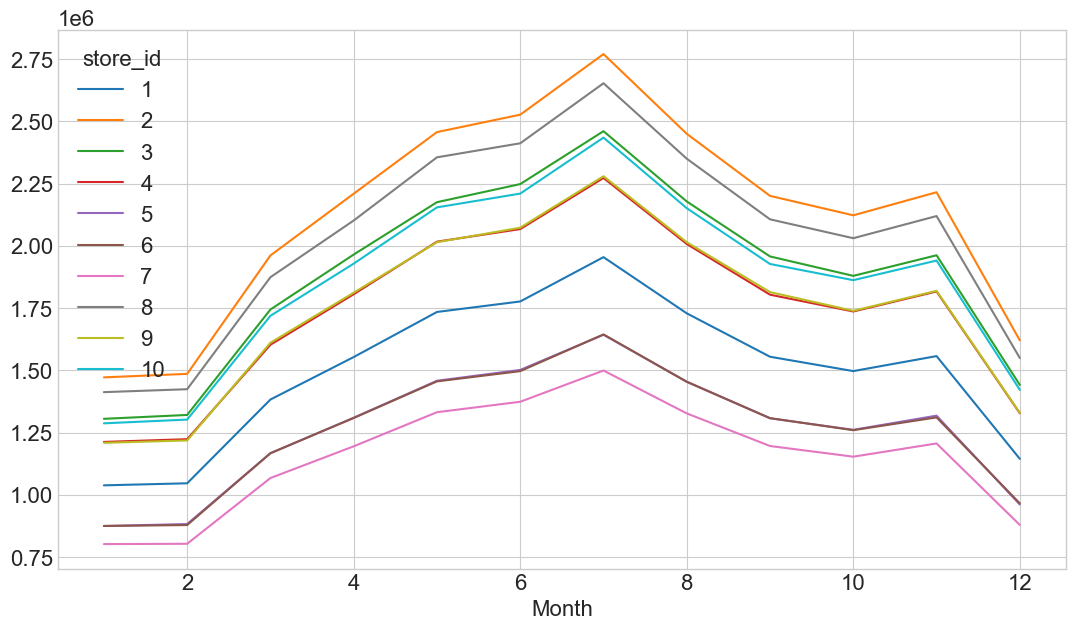

In [55]:
train.groupby([train.index.month, train.store_id]).sales_total.sum().unstack().plot()
plt.xlabel('Month')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

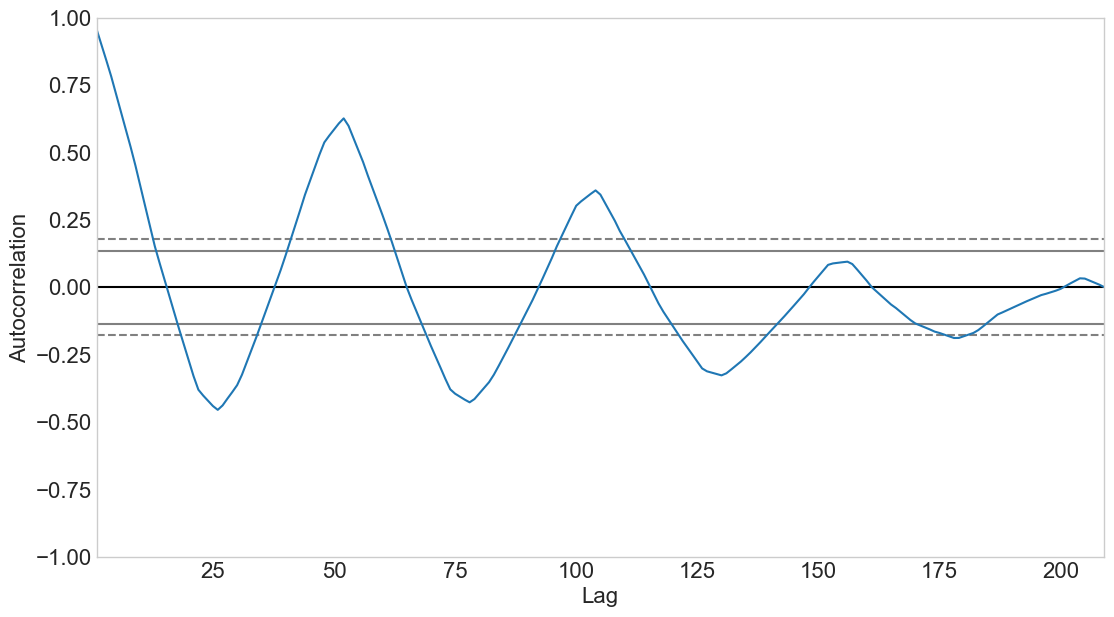

In [59]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [60]:
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


<AxesSubplot:xlabel='sale_date'>

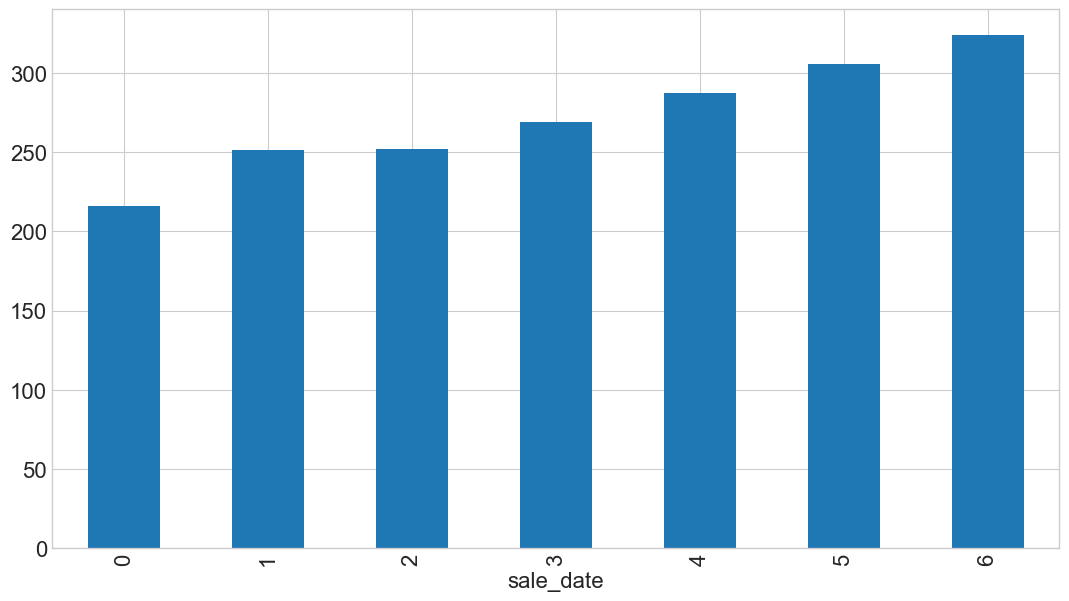

In [66]:
train.groupby(train.index.day_of_week).sales_total.mean().plot.bar()

<AxesSubplot:xlabel='sale_date'>

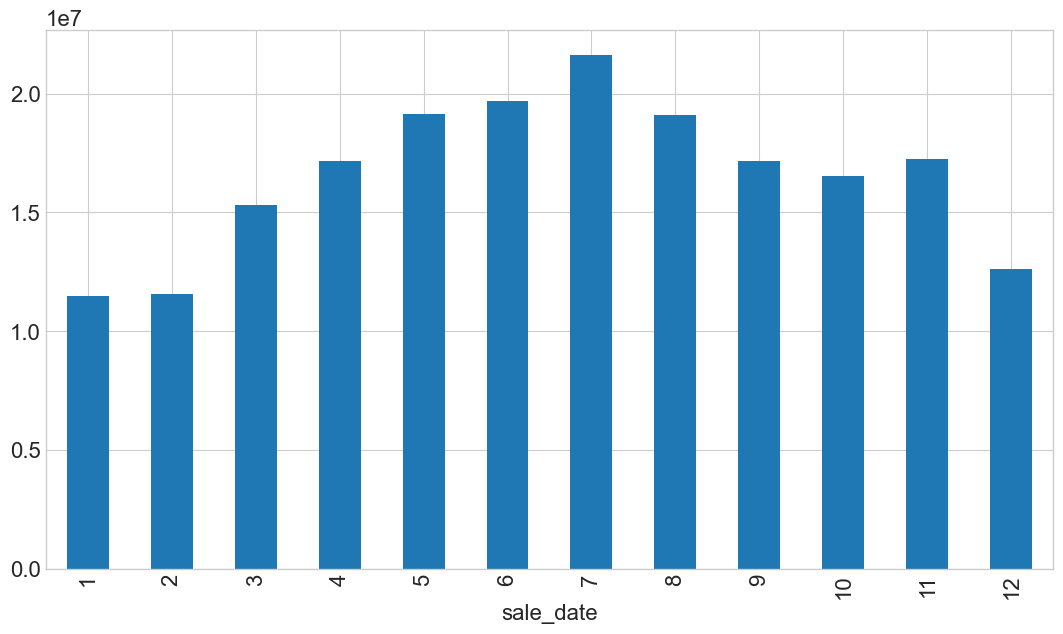

In [68]:
train.groupby(train.index.month).sales_total.sum().plot.bar()

In [83]:
plt.plot(store.index, store.sales_total)

AttributeError: 'Series' object has no attribute 'sales_total'

In [102]:
store_1 = train[train.store_id == 1]

In [103]:
store_1

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,1,26,300436344045,300436344045,Triaminic,Triaminic Syrup Night Time Cold & Cough Grape 4oz,0.98,456501,16,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,15.68
2013-01-01,1,27,24600017008,24600017008,Morton,Morton Kosher Salt Coarse,6.01,474761,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,84.14
2013-01-01,1,28,719175900007,719175900007,Usda Produce,Guava,7.52,493021,49,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,368.48
2013-01-01,1,29,13000001038,13000001038,Heinz,Heinz Tomato Ketchup - 2 Ct,8.65,511281,34,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,294.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31,1,6,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,92761,53,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,367.29
2016-12-31,1,3,23923330139,23923330139,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,37981,29,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,70.47
2016-12-31,1,22,16000288829,16000288829,Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,384921,58,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,December,Saturday,423.98


In [104]:
store_1[store_1.sales_total <= 1]

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,


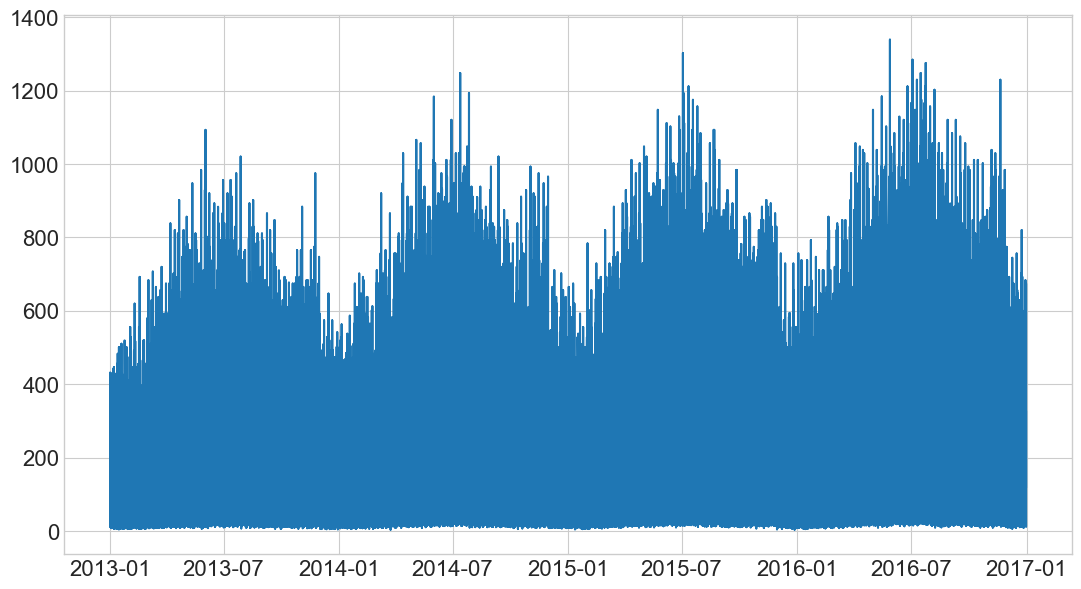

In [105]:
plt.plot(store_1.index, store_1.sales_total)

<AxesSubplot:xlabel='day_of_week', ylabel='sales_total'>

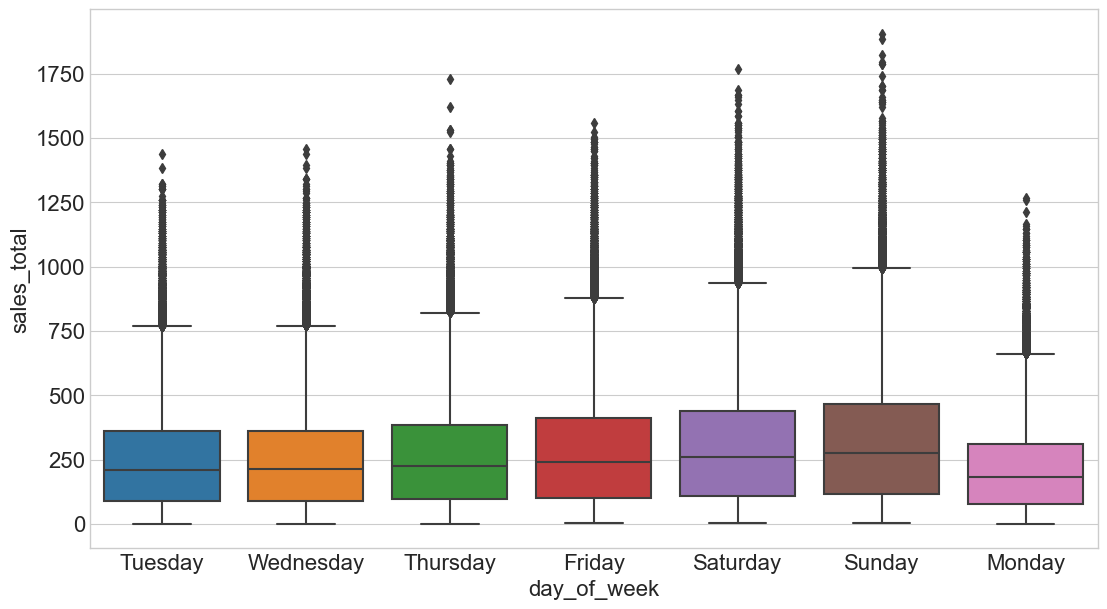

In [106]:
sns.boxplot(data=train, x='day_of_week', y='sales_total')

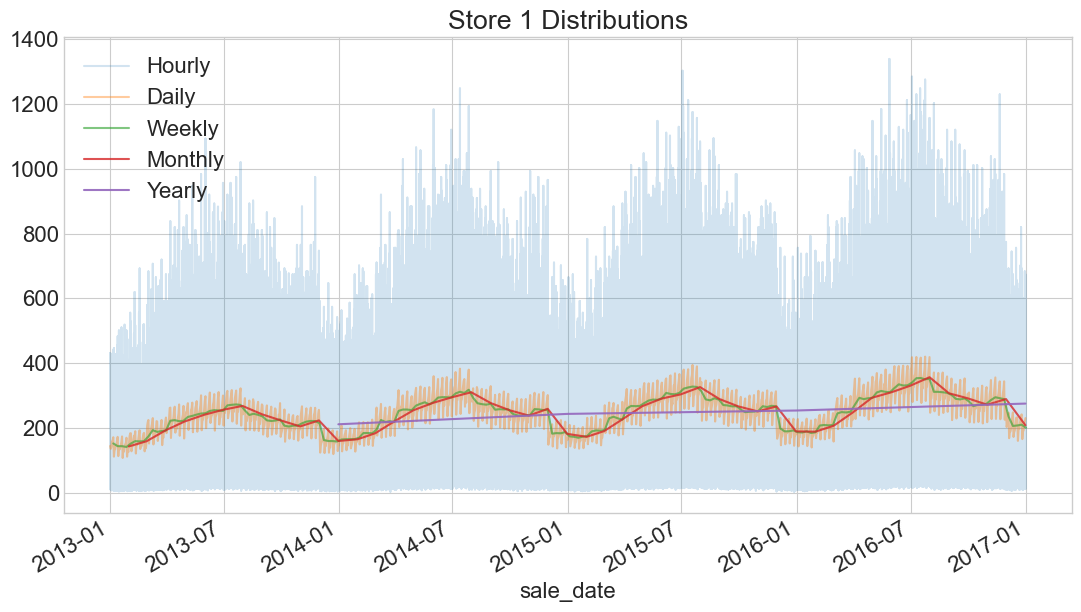

In [110]:
store_1.sales_total.plot(alpha=0.2, label='Hourly')
store_1.resample('D').sales_total.mean().plot(alpha=0.4, label='Daily')
store_1.resample('W').sales_total.mean().plot(alpha=0.6, label='Weekly')
store_1.resample('M').sales_total.mean().plot(alpha=0.8, label='Monthly')
store_1.resample('Y').sales_total.mean().plot(alpha=0.9, label='Yearly')
plt.legend()
plt.title('Store 1 Distributions')
plt.show()

In [113]:
y = store_1.sales_total.resample('M').mean()
result = sm.tsa.seasonal_decompose(y)

In [114]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid})

In [115]:
decomposition

,y,trend,seasonal,residual
sale_date,,,,
2013-01-31,143.080142,NaN,-71.621791,NaN
2013-02-28,158.899871,NaN,-55.616354,NaN
2013-03-31,193.300826,NaN,-18.175102,NaN
2013-04-30,220.063620,NaN,18.867621,NaN
2013-05-31,240.660032,NaN,37.981173,NaN
2013-06-30,256.012267,NaN,53.079239,NaN
2013-07-31,268.092194,212.064015,65.129240,-9.101062
2013-08-31,242.378587,214.023911,31.815597,-3.460921
2013-09-30,223.446073,216.219960,9.188607,-1.962494


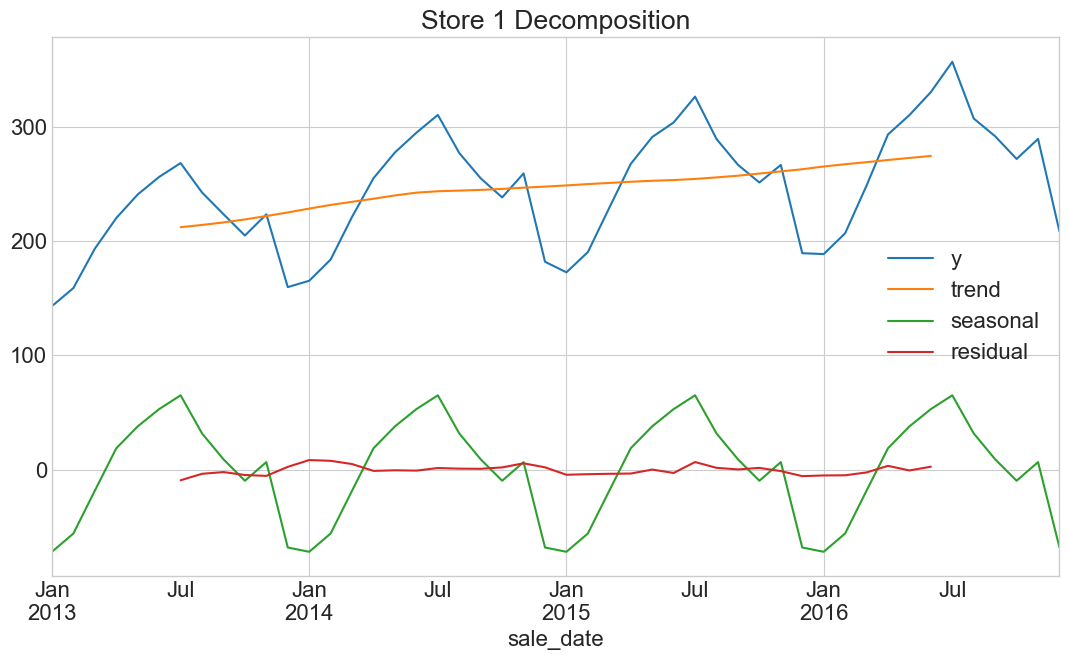

In [117]:
decomposition.plot()
plt.title('Store 1 Decomposition')
plt.show()

In [118]:
ax = (store_1
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.datetimes.DatetimeIndex'> was passed